<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
using PyPlot
using JuMP
using Ipopt
using Gallium

In [2]:
include("projection.jl")

prox_iter (generic function with 1 method)

In [3]:
function UC(r)
    x = -r:0.01:r
    aux = zeros(length(x))
    for i in 1:length(x)
        aux[i] = sqrt(r^2-x[i]^2)
    end
    return x, aux
end

function DC(r)
    x = -r:0.01:r
    aux = zeros(length(x))
    for i in 1:length(x)
        aux[i] = -sqrt(r^2-x[i]^2)
    end
    return x, aux
end

DC (generic function with 1 method)

In [4]:
function circle(x,i)
     return (x[1]-Z[i,1])^2 + (x[2]-Z[i,2])^2 - Z[i,3]^2
end

function posit(x,i)
     return -x[1]
end

function expo(x,i)
    return exp(Z[i,1]*x[1]) - x[2]
end

function subgradient(fname, i, x)
    if fname == "circle"
         return [2*(x[1]-Z[i,1]); 2*(x[2]-Z[i,2])]
    elseif fname == "expo"
        return [Z[i,1]*exp(Z[i,1]*x[1]); -1]
    elseif fname == "posit"
        return [-1; 0]
    else
         println("oups")
    end
end

subgradient (generic function with 1 method)

In [5]:
x0 = [4,4]
Z = hcat([1,0,0], [-1,0,0], [0, 1, 1])'
I0 = collect(1:size(Z)[1])
ITER_MAX = 100000
precision = 0.000001
ω = ones(length(I0))/(length(I0))
fname_tabu = ["expo", "expo", "circle"]

3-element Array{String,1}:
 "expo"  
 "expo"  
 "circle"

In [6]:
XM, DM, it = algo_proj(fname_tabu, I0, x0, ω, ITER_MAX, precision);

DM = 0.00014598012908928482
precision = 1.0e-6


In [9]:
# XM[it,:]

In [10]:
Xp = -2:0.1:2
Yp = exp.(Xp);

In [11]:
xu, yu = UC(Z[3,3])
xd, yd = DC(Z[3,3])

(-1.0:0.01:1.0, [-0.0, -0.141067, -0.198997, -0.243105, -0.28, -0.31225, -0.341174, -0.36756, -0.391918, -0.414608  …  -0.414608, -0.391918, -0.36756, -0.341174, -0.31225, -0.28, -0.243105, -0.198997, -0.141067, -0.0])

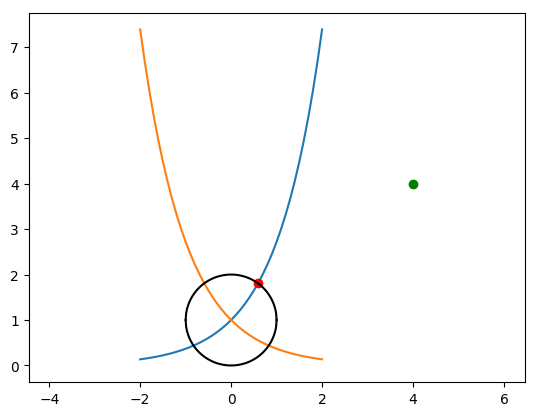

(-2.3, 4.3, -0.36945280494653254, 7.758508903877183)

In [12]:
plot(Xp, Yp)
plot(Xp, exp.(-Xp))
plot(x0[1], x0[2], "o", color = "green")
# plot(XM[2:it-1,1], XM[2:it-1,2], "o", color = "yellow")
plot(XM[1], XM[2], "o", color = "red")
plot(xu+Z[3,1],yu+Z[3,2], color = "black")
plot(xd+Z[3,1],yd+Z[3,2], color = "black")
axis("equal")

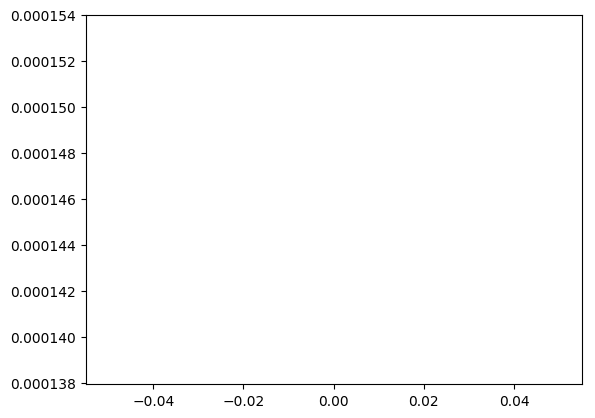

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe69efb6438>

In [13]:
plot(DM)

In [14]:
x0 = [4,2]
Z = hcat([0,1,2], [0,-1,2])'
I0 = collect(1:size(Z)[1])
ITER_MAX = 100000
precision = 0.000001
ω = ones(length(I0))/(length(I0))
fname_tabu = ["circle", "circle"]

2-element Array{String,1}:
 "circle"
 "circle"

In [15]:
XM, DM, it = algo_proj(fname_tabu, I0, x0, ω, ITER_MAX, precision);

DM = 0.004917163427928806
precision = 1.0e-6


In [16]:
xu1, yu1 = UC(Z[1,3])
xd1, yd1 = DC(Z[1,3])
xu2, yu2 = UC(Z[2,3])
xd2, yd2 = DC(Z[2,3])

(-2.0:0.01:2.0, [-0.0, -0.19975, -0.282135, -0.345109, -0.397995, -0.44441, -0.48621, -0.5245, -0.56, -0.593212  …  -0.593212, -0.56, -0.5245, -0.48621, -0.44441, -0.397995, -0.345109, -0.282135, -0.19975, -0.0])

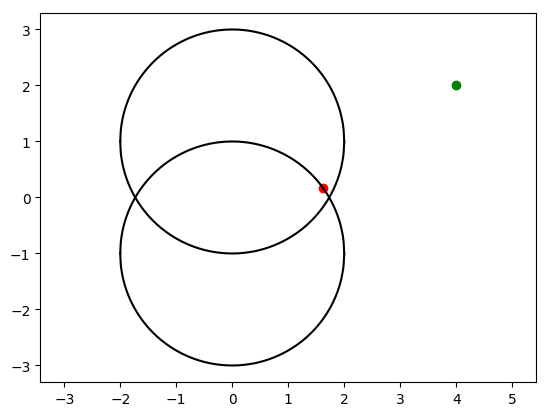

(-2.3, 4.3, -3.3, 3.3)

In [17]:
plot(x0[1], x0[2], "o", color = "green")
# plot(XM[2:it-1,1], XM[2:it-1,2], "o", color = "yellow")
plot(XM[1], XM[2], "o", color = "red")
plot(xu1+Z[1,1],yu1+Z[1,2], color = "black")
plot(xd1+Z[1,1],yd1+Z[1,2], color = "black")
plot(xu2+Z[2,1],yu2+Z[2,2], color = "black")
plot(xd2+Z[2,1],yd2+Z[2,2], color = "black")
axis("equal")

In [16]:
it

4